In [43]:
import keras 
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,MaxPooling2D,Conv2D,BatchNormalization,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [6]:
img_rows=128
train_dir="/kaggle/input/blended-malware-image-dataset/malware_dataset/train"
validation_dir="/kaggle/input/blended-malware-image-dataset/malware_dataset/val"

batch_size=32
# Data Augmentation

train_datagenerator=ImageDataGenerator(
    rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest'
    

)

validation_datagenerator=ImageDataGenerator(
    rescale=1./255
)

train_generator=train_datagenerator.flow_from_directory(
    
    train_dir,
    target_size=(img_rows,img_rows),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
validation_generator=validation_datagenerator.flow_from_directory(
    
    validation_dir,
    target_size=(img_rows,img_rows),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 9868 images belonging to 31 classes.
Found 3879 images belonging to 31 classes.


In [19]:
import os

directory_path = '/kaggle/input/blended-malware-image-dataset/malware_dataset/train'

file_names = os.listdir(directory_path)
classes=[]
class_counts={}
for file_name in file_names:
    classes.append(file_name)
for class_name in classes:
    class_path = os.path.join(directory_path, class_name)
    file_count = len([file for file in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, file))])
    class_counts[class_name] = file_count


In [20]:
classes

['Amonetize',
 'HackKMS',
 'C2LOP.gen!g',
 'Expiro',
 'MultiPlug',
 'BrowseFox',
 'Dinwod',
 'Lolyda.AA2',
 'Lolyda.AA1',
 'Hlux',
 'Vilsel',
 'Agent',
 'Adposhel',
 'Neoreklami',
 'Alueron.gen!J',
 'Regrun',
 'InstallCore',
 'Neshta',
 'Sality',
 'Androm',
 'Dialplatform.B',
 'Stantinko',
 'Snarasite',
 'Autorun',
 'VBA',
 'Allaple',
 'Injector',
 'Elex',
 'Fasong',
 'VBKrypt',
 'Fakerean']

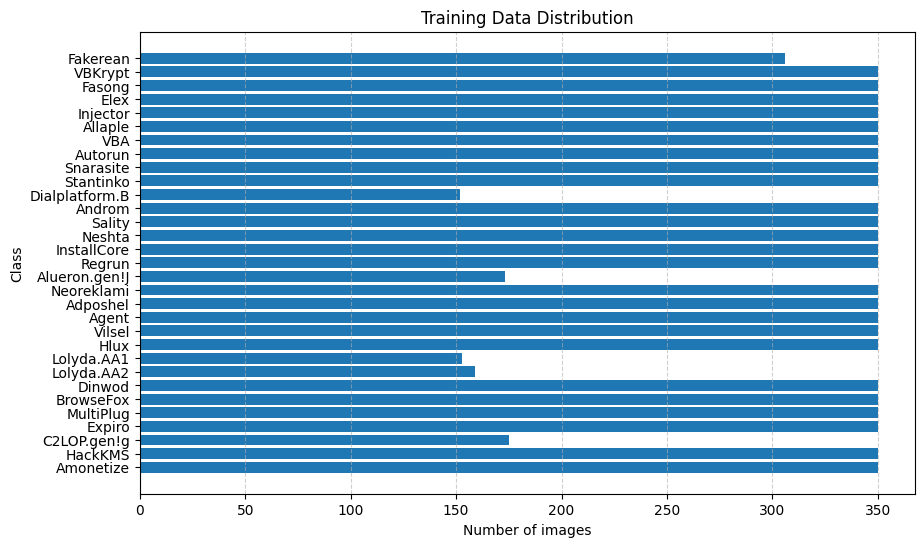

In [25]:
plt.figure(figsize=(10, 6))
plt.barh(list(class_counts.keys()), list(class_counts.values()))
plt.xlabel('Number of images')
plt.ylabel('Class')
plt.title('Training Data Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [27]:
import os

directory_path = '/kaggle/input/blended-malware-image-dataset/malware_dataset/val'

file_names = os.listdir(directory_path)
classes=[]
class_counts={}
for file_name in file_names:
    classes.append(file_name)
for class_name in classes:
    class_path = os.path.join(directory_path, class_name)
    file_count = len([file for file in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, file))])
    class_counts[class_name] = file_count


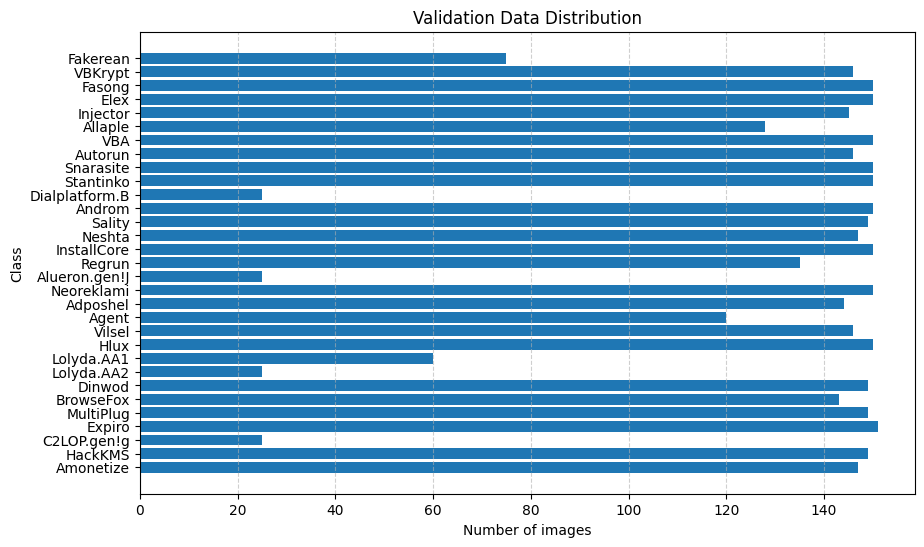

In [29]:
plt.figure(figsize=(10, 6))
plt.barh(list(class_counts.keys()), list(class_counts.values()))
plt.xlabel('Number of images')
plt.ylabel('Class')
plt.title('Validation Data Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [36]:
num_classes=len(classes)
num_classes

31

In [47]:
model=Sequential()

model.add(Conv2D(512,(3,3),padding="same",activation='relu',input_shape=(img_rows,img_rows,3)))
model.add(Conv2D(512,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(128,(3,3),padding="same",activation='relu'))
model.add(Conv2D(128,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),padding="same",activation='relu'))
model.add(Conv2D(32,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))



model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 128, 128, 512)     14336     
                                                                 
 conv2d_26 (Conv2D)          (None, 128, 128, 512)     2359808   
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 64, 512)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 64, 64, 512)       2048      
 tchNormalization)                                               
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 512)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 128)      

In [48]:
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint("/content/drive/MyDrive/catvsdog/malware_classification.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)


earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 5, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.001,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.0001),
              metrics = ['accuracy'])

nb_train_samples = 9868
nb_validation_samples = 3879
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

/tmp/ipykernel_26/1824041604.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10


2024-01-16 07:21:34.233188: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


308/308 [==============================] - ETA: 0s - loss: 2.4971 - accuracy: 0.3204
Epoch 1: val_loss improved from inf to 11.19035, saving model to /content/drive/MyDrive/catvsdog/malware_classification.h5
308/308 [==============================] - 419s 1s/step - loss: 2.4971 - accuracy: 0.3204 - val_loss: 11.1903 - val_accuracy: 0.0302 - lr: 0.0010
Epoch 2/10


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


308/308 [==============================] - ETA: 0s - loss: 1.5592 - accuracy: 0.5574
Epoch 2: val_loss improved from 11.19035 to 3.56751, saving model to /content/drive/MyDrive/catvsdog/malware_classification.h5
308/308 [==============================] - 355s 1s/step - loss: 1.5592 - accuracy: 0.5574 - val_loss: 3.5675 - val_accuracy: 0.2291 - lr: 0.0010
Epoch 3/10
308/308 [==============================] - ETA: 0s - loss: 1.1991 - accuracy: 0.6646
Epoch 3: val_loss did not improve from 3.56751
308/308 [==============================] - 354s 1s/step - loss: 1.1991 - accuracy: 0.6646 - val_loss: 5.0674 - val_accuracy: 0.2774 - lr: 0.0010
Epoch 4/10
308/308 [==============================] - ETA: 0s - loss: 1.0422 - accuracy: 0.7108
Epoch 4: val_loss improved from 3.56751 to 2.46978, saving model to /content/drive/MyDrive/catvsdog/malware_classification.h5
308/308 [==============================] - 353s 1s/step - loss: 1.0422 - accuracy: 0.7108 - val_loss: 2.4698 - val_accuracy: 0.5372 -

In [49]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/catvsdog/malware_classification.h5')


In [51]:
loaded_model.save('/kaggle/working/malware_classifcation.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


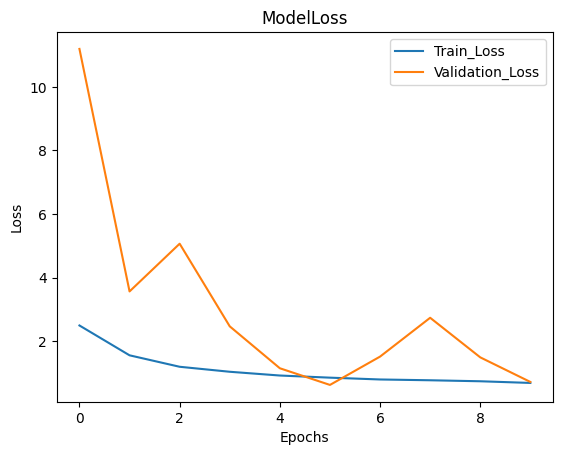

In [52]:
# plotting Training and validation loss
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ModelLoss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train_Loss','Validation_Loss'],loc='upper right')
plt.show()

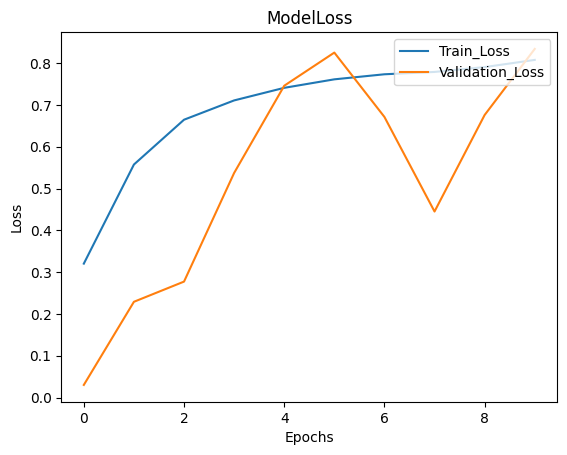

In [53]:
# plotting Accuracy and validation Accuracy
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ModelLoss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train_Loss','Validation_Loss'],loc='upper right')
plt.show()

In [55]:
class_indices = train_generator.class_indices
print("Class indices:", class_indices)

Class indices: {'Adposhel': 0, 'Agent': 1, 'Allaple': 2, 'Alueron.gen!J': 3, 'Amonetize': 4, 'Androm': 5, 'Autorun': 6, 'BrowseFox': 7, 'C2LOP.gen!g': 8, 'Dialplatform.B': 9, 'Dinwod': 10, 'Elex': 11, 'Expiro': 12, 'Fakerean': 13, 'Fasong': 14, 'HackKMS': 15, 'Hlux': 16, 'Injector': 17, 'InstallCore': 18, 'Lolyda.AA1': 19, 'Lolyda.AA2': 20, 'MultiPlug': 21, 'Neoreklami': 22, 'Neshta': 23, 'Regrun': 24, 'Sality': 25, 'Snarasite': 26, 'Stantinko': 27, 'VBA': 28, 'VBKrypt': 29, 'Vilsel': 30}


In [59]:

from sklearn.metrics import classification_report,confusion_matrix
target_names=list(class_indices.keys())

y_pred=model.predict_generator(validation_generator,nb_validation_samples//batch_size+1)
y_pred=np.argmax(y_pred,axis=1) # gives highest predicted value for axis 1 in each row
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes,y_pred))

print("Classification Report")
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/tmp/ipykernel_26/3740086182.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred=model.predict_generator(validation_generator,nb_validation_samples//batch_size+1)


Confusion Matrix
[[ 6  6  7  0  3  9  5  2  1  1  4  7 10  2  5  7  9  4  6  3  0  3  7  3
   2  2  6  5  8  5  6]
 [ 7  6  5  0  7  5  2  5  4  2  5  3  5  1  4  4  3  2  3  3  2  5  8  4
   3  4  4  3  7  3  1]
 [ 1  4  5  0  3  8  6  3  3  0  7  9  4  2  5  5  4  2  6  1  1  5  0  3
   3  3  9  8  4  9  5]
 [ 1  1  2  0  0  0  2  1  0  1  2  2  2  1  0  2  1  2  0  0  1  0  1  1
   0  0  0  0  1  0  1]
 [ 9  6  9  2  4  5  7  3  4  1  3  9  6  4  3  4  3  2  9  5  2  6  6  2
   5  4  6  4  4  5  5]
 [ 8  3  4  0  5  6  4  6  7  0  5  7  4  5  6  9  7  4  2  3  2  5 12  3
   5  0 10  4  5  5  4]
 [ 6  2  8  4  5  5  4 11  2  0  5  2  8  2  3  3  7  4  6  3  2 10  8  3
   8  2 10  3  2  5  3]
 [ 7  7  6  6  3  8  5  5  2  1 11  3  6  2  7  5  6  4  6  2  0  4  2  2
   6  1  6  7  2  3  8]
 [ 2  0  1  0  0  0  1  1  0  0  1  3  1  0  3  0  1  0  1  0  0  0  2  1
   2  1  1  1  0  2  0]
 [ 1  0  0  0  1  2  1  2  0  1  0  1  1  0  0  1  1  2  1  0  0  1  2  0
   2  0  1  1  2  0  1]
 [ 

1/1 [==============================] - 0s 164ms/step


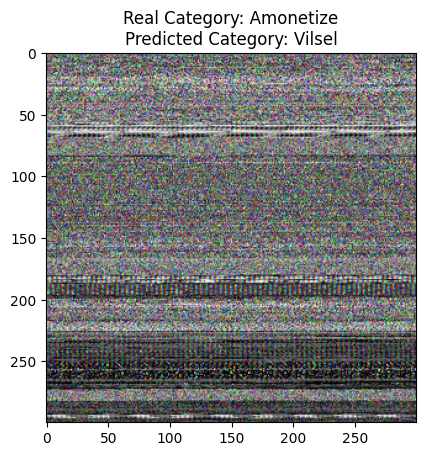

In [87]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.image as img
import numpy as np
import matplotlib.pyplot as plt
import os

# Dictionary mapping class indices to malware names
d = {
    0: 'Adposhel', 1: 'Agent', 2: 'Allaple', 3: 'Alueron.gen!J', 4: 'Amonetize',
    5: 'Androm', 6: 'Autorun', 7: 'BrowseFox', 8: 'C2LOP.gen!g', 9: 'Dialplatform.B',
    10: 'Dinwod', 11: 'Elex', 12: 'Expiro', 13: 'Fakerean', 14: 'Fasong', 15: 'HackKMS',
    16: 'Hlux', 17: 'Injector', 18: 'InstallCore', 19: 'Lolyda.AA1', 20: 'Lolyda.AA2',
    21: 'MultiPlug', 22: 'Neoreklami', 23: 'Neshta', 24: 'Regrun', 25: 'Sality',
    26: 'Snarasite', 27: 'Stantinko', 28: 'VBA', 29: 'VBKrypt', 30: 'Vilsel'
}

image_path = '/kaggle/input/blended-malware-image-dataset/malware_dataset/val/Amonetize/b14852baf84f3ece79c45d863a5556227e178d4aresized_image.png'
classifier = load_model('/kaggle/working/malware_classifcation.h5')

# Extract true label from image_path based on directory
true_label = os.path.basename(os.path.dirname(image_path))

# Load and preprocess the test image
test_image = image.load_img(image_path, target_size=(128, 128, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the category
result = classifier.predict(test_image)
predicted_label = d[np.argmax(result)]

# Display the image
testImage = img.imread(image_path)
plt.imshow(testImage)
plt.title(f'Real Category: {true_label}\nPredicted Category: {predicted_label}')
plt.show()


1/1 [==============================] - 0s 175ms/step


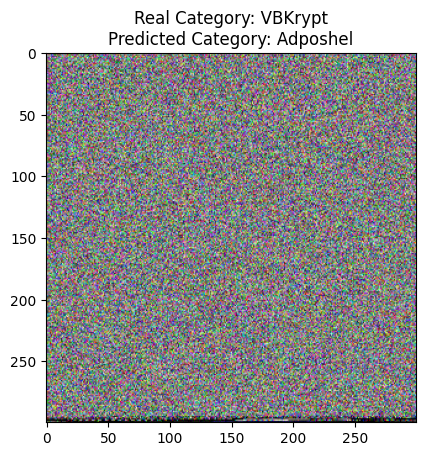

In [91]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.image as img
import numpy as np
import matplotlib.pyplot as plt
import os

# Dictionary mapping class indices to malware names
d = {
    0: 'Adposhel', 1: 'Agent', 2: 'Allaple', 3: 'Alueron.gen!J', 4: 'Amonetize',
    5: 'Androm', 6: 'Autorun', 7: 'BrowseFox', 8: 'C2LOP.gen!g', 9: 'Dialplatform.B',
    10: 'Dinwod', 11: 'Elex', 12: 'Expiro', 13: 'Fakerean', 14: 'Fasong', 15: 'HackKMS',
    16: 'Hlux', 17: 'Injector', 18: 'InstallCore', 19: 'Lolyda.AA1', 20: 'Lolyda.AA2',
    21: 'MultiPlug', 22: 'Neoreklami', 23: 'Neshta', 24: 'Regrun', 25: 'Sality',
    26: 'Snarasite', 27: 'Stantinko', 28: 'VBA', 29: 'VBKrypt', 30: 'Vilsel'
}
image_path='/kaggle/input/blended-malware-image-dataset/malware_dataset/val/VBKrypt/d6718996a1700b37b42204ec9aa4899bcc257968resized_image.png'
classifier = load_model('/kaggle/working/malware_classifcation.h5')

# Extract true label from image_path based on directory
true_label = os.path.basename(os.path.dirname(image_path))

# Load and preprocess the test image
test_image = image.load_img(image_path, target_size=(128, 128, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the category
result = classifier.predict(test_image)
predicted_label = d[np.argmax(result)]

# Display the image
testImage = img.imread(image_path)
plt.imshow(testImage)
plt.title(f'Real Category: {true_label}\nPredicted Category: {predicted_label}')
plt.show()
